In [1]:
# to plot the rectangles
import matplotlib.pyplot as plt
# to parse the text file
import re
# to store the data as a dataframe
import pandas as pd

In [3]:
def parse_file(filename:str)->pd.DataFrame:
    """Parse the text file and return a dataframe with the rectangle coordinates and ids of the form:
    rectangle_id, x_min, y_min, x_max, y_max

    Uses regular expressions to parse the text file that consists of 5 comma-separated values each of which is a sequence of one or more digits
    
    NOTE: Change the regular expression pattern to match the text file that you are using refer to the following link for more information: https://regex_min01.com/ 
    
    regular expression pattern:
        regex = r".(\d+),(.\d+),(.\d+),(.\d+),(.\d+)."
        details:
            `.` is used to match any character except a newline
            `\d+` is used to match one or more digits
        the `.` is used to match any character except a newline, which ensures that the pattern matches the entire string even if it contains space characters or other characters other than digits `{` or `}`
    
    Args:
        filename (str): path to the text file

    Returns:
        pd.DataFrame: a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner
        
        the index of the dataframe is the rectangle_id
    """

    # read the file
    with open(filename, 'r') as file:
        data = file.read()
    # regular expression pattern is used to match a string 
    # that consists of five comma-separated values
    
    regex = r".(\d+),(.\d+),(.\d+),(.\d+),(.\d+)."
    matches = re.findall(regex, data)

    df = pd.DataFrame(matches, columns=['rectangle_id', 'x_min', 'y_min', 'x_max', 'y_max'])
    df[['x_min', 'y_min', 'x_max', 'y_max']] = df[['x_min', 'y_min', 'x_max', 'y_max']].astype(int)

    return df.set_index('rectangle_id').reset_index()

In [4]:
df = parse_file('test_data.txt')
df.describe()

,x_min,y_min,x_max,y_max
count,10.000000,10.000000,10.000000,10.000000
mean,8.300000,10.400000,12.400000,14.400000
std,4.423423,3.339993,4.325634,3.717825
min,3.000000,5.000000,7.000000,9.000000
25%,4.500000,8.000000,9.500000,10.500000
50%,8.500000,10.500000,12.000000,16.000000
75%,10.750000,13.000000,14.500000,17.750000
max,16.000000,15.000000,19.000000,18.000000


In [5]:
df

,rectangle_id,x_min,y_min,x_max,y_max
0,1,4,13,7,16
1,2,10,13,13,16
2,3,3,11,13,18
3,4,6,7,11,12
4,5,7,8,9,10
5,6,11,8,15,10
6,7,13,10,19,18
7,8,16,14,19,17
8,9,10,15,11,18
9,10,3,5,7,9


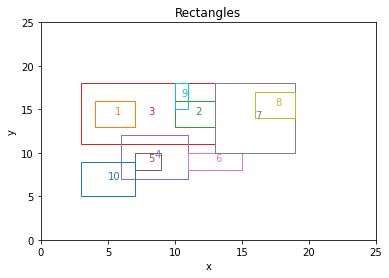

In [6]:
def plot_rectangles(rectangles_df,point=None):
    """Plot the rectangles

    Args:
        rectangles_df (dataframe): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner
            
    """
    fig, ax = plt.subplots()
    for idx,rectangle_id, x_min, y_min, x_max, y_max in df.itertuples():
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=None, edgecolor=f'C{rectangle_id}'))
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2, y_min + (y_max - y_min) / 2), color=f'C{rectangle_id}')
    
    
    # set the limits of the axes
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 25)
    if point != None:
        ax.plot(point[0], point[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
    ax.set_title('Rectangles')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

plot_rectangles(df)

### Q1) Accept input {x, y} from the keyboard. Print if this point lies within any of the rectangles in the given test data set. If yes then list the rectangles enclosing the given point in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}. 
Eg: {1, 5, 8} implies that given point(x, y) is enclosed in the rectangles 1, 5 and 8.

In [10]:
def inRectangle(x1, y1, x2,
              y2, x, y) :
    return x >= x1 and x <= x2 and y >= y1 and y <= y2

In [15]:
def pointInRectangles(df, point):
    rectangles = []
    for idx,rectangle_id, x_min, y_min, x_max, y_max in df.itertuples():
        x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
        if inRectangle(x_min, y_min, x_max, y_max, point[0], point[1]):
            rectangles.append([rectangle_id, x_min, y_min, x_max, y_max])
    if rectangles:
        df = pd.DataFrame(rectangles, columns=['rectangle_id', 'x_min', 'y_min', 'x_max', 'y_max'])
        return df.set_index('rectangle_id').reset_index()

In [16]:
point = (10.5, 15.5)
pointInRectangles(df,point)

,rectangle_id,x_min,y_min,x_max,y_max
0,2,10,13,13,16
1,3,3,11,13,18
2,9,10,15,11,18


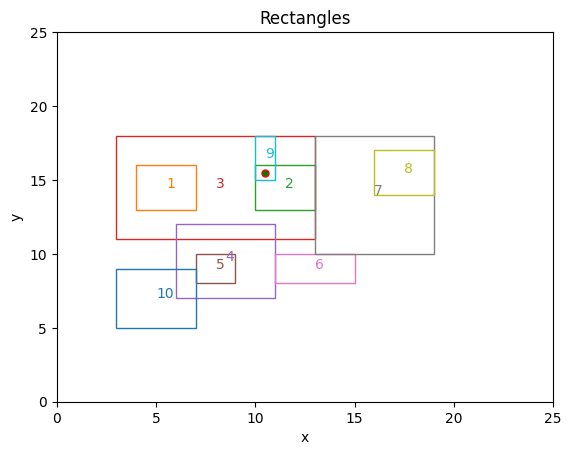

In [17]:
plot_rectangles(df,point)

### Q2) List of rectangles that don't overlap any other rectangles. The output should be in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id} 

In [18]:
df

,rectangle_id,x_min,y_min,x_max,y_max
0,1,4,13,7,16
1,2,10,13,13,16
2,3,3,11,13,18
3,4,6,7,11,12
4,5,7,8,9,10
5,6,11,8,15,10
6,7,13,10,19,18
7,8,16,14,19,17
8,9,10,15,11,18
9,10,3,5,7,9


In [19]:
def overlap(rect1, rect2):
    id_1,x_min, y_min, x_max, y_max = rect1
    id_2,x_min2, y_min2, x_max2, y_max2 = rect2
    # print(x_min, y_min, x_max, y_max, x_min2, y_min2, x_max2, y_max2)
    return not (x_max < x_min2 or x_min > x_max2 or y_max < y_min2 or y_min > y_max2)

def pointInRectangles(rectangles):
    overlap_list = []
    non_overlap_list = []
    for i in range(rectangles.shape[0]):
        rect1 = rectangles.iloc[i, :]
        for j in range(i+1, rectangles.shape[0]):
            rect2 = rectangles.iloc[j, :]
            # print(i,j,rect1, rect2)
            if overlap(rect1, rect2):
                overlap_list.append((rectangles.iloc[i, :]['rectangle_id'],rectangles.iloc[j, :]['rectangle_id']))
            else:
                non_overlap_list.append((rectangles.iloc[i, :]['rectangle_id'],rectangles.iloc[j, :]['rectangle_id']))

    return overlap_list, non_overlap_list


In [20]:
pointInRectangles(df)

([('1', '3'),
  ('2', '3'),
  ('2', '7'),
  ('2', '9'),
  ('3', '4'),
  ('3', '7'),
  ('3', '9'),
  ('4', '5'),
  ('4', '6'),
  ('4', '10'),
  ('5', '10'),
  ('6', '7'),
  ('7', '8')],
 [('1', '2'),
  ('1', '4'),
  ('1', '5'),
  ('1', '6'),
  ('1', '7'),
  ('1', '8'),
  ('1', '9'),
  ('1', '10'),
  ('2', '4'),
  ('2', '5'),
  ('2', '6'),
  ('2', '8'),
  ('2', '10'),
  ('3', '5'),
  ('3', '6'),
  ('3', '8'),
  ('3', '10'),
  ('4', '7'),
  ('4', '8'),
  ('4', '9'),
  ('5', '6'),
  ('5', '7'),
  ('5', '8'),
  ('5', '9'),
  ('6', '8'),
  ('6', '9'),
  ('6', '10'),
  ('7', '9'),
  ('7', '10'),
  ('8', '9'),
  ('8', '10'),
  ('9', '10')])

### Q3) List of rectangles that overlap with other rectangles in the format {{rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, ..... {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}}
Eg: {{5, 7, 9, 12}, {6, 10, 12}} implies that rectangle 5 overlaps with rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.




In [7]:
#3rd qn
def overlap(rect1, rect2):
    id_1,x_min, y_min, x_max, y_max = rect1
    id_2,x_min2, y_min2, x_max2, y_max2 = rect2
    # print(x_min, y_min, x_max, y_max, x_min2, y_min2, x_max2, y_max2)
    return not (x_max <= x_min2 or x_min >= x_max2 or y_max <= y_min2 or y_min >= y_max2)

In [8]:
overlapped_rects=[]
for i in df["rectangle_id"]:
    i=int(i)
    p=[]
    p.append(i)
    rect1=i,df["x_min"][i-1],df["y_min"][i-1],df["x_max"][i-1],df["y_max"][i-1]
    #print(rect1)
    for j in df["rectangle_id"]:
        j=int(j)
        if(i!=j):
            rect2=j,df["x_min"][j-1],df["y_min"][j-1],df["x_max"][j-1],df["y_max"][j-1]
            #print(rect2)
            if overlap(rect1,rect2)==1:
                p.append(rect2[0])
    overlapped_rects.append(p)
#print(overlapped_rects)
overlapped_rects_fin=[]
for i in overlapped_rects:
    if len(i)>1:
        overlapped_rects_fin.append(i)
print(overlapped_rects_fin)

[[1, 3], [2, 3, 9], [3, 1, 2, 4, 9], [4, 3, 5, 10], [5, 4], [7, 8], [8, 7], [9, 2, 3], [10, 4]]


### Q4) List of rectangles that contain other rectangles in the format {rectangle_id, list_of_rectangle_ids_which_are_contained_in}
Eg: {{5, 2, 6}, {4, 3, 9}} implies that rectangle 5 contains rectangles 2 and 6; rectangle 4 contains rectangles 3 and 9.

In [10]:
#4th qn
def contain(rect1, rect2):
    id_1,x_min, y_min, x_max, y_max = rect1
    id_2,x_min2, y_min2, x_max2, y_max2 = rect2
    # print(x_min, y_min, x_max, y_max, x_min2, y_min2, x_max2, y_max2)
    return (x_max2 <= x_max and x_min2 >= x_min and y_max2 <= y_max and y_min2 >= y_min)

In [11]:
contained_rects=[]
for i in df["rectangle_id"]:
    i=int(i)
    p=[]
    p.append(i)
    rect1=i,df["x_min"][i-1],df["y_min"][i-1],df["x_max"][i-1],df["y_max"][i-1]
    #print(rect1)
    for j in df["rectangle_id"]:
        j=int(j)
        if(i!=j):
            rect2=j,df["x_min"][j-1],df["y_min"][j-1],df["x_max"][j-1],df["y_max"][j-1]
            #print(rect2)
            if contain(rect1,rect2)==1:
                p.append(rect2[0])
    contained_rects.append(p)
#print(contained_rects)
contained_rects_fin=[]
for i in contained_rects:
    if len(i)>1:
        contained_rects_fin.append(i)
print(contained_rects_fin)

[[3, 1, 2, 9], [4, 5], [7, 8]]


### Q5) List the rectangles that are abutting each other in the following format {rectangle_id, which side_(e, w, n, s), rectangle_id_of_abutting_rectangle_id}
Eg: {{5, n, 7}, {4, e, 3}} implies that rectangle 5 has rectangle 7 abutting it on the northern side, rectangle 4 has rectangle 3 abutting it on the eastern side.